In [11]:
import networkx as nx
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [12]:
air_graph = nx.read_gml("2016_aggregated_air_network.gml")
print(type(air_graph).__name__)

air_net = air_graph.to_undirected()
print(type(air_net).__name__)

DiGraph
Graph


# Degree Distribution

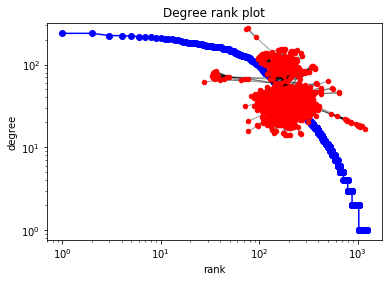

In [13]:
# Degree Rank Plot
degree_sequence=sorted(nx.degree(air_net).values(),reverse=True)
#print(degree_sequence)
dmax=max(degree_sequence)

plt.loglog(degree_sequence,'b-',marker='o')
plt.title("Degree rank plot")
plt.ylabel("degree")
plt.xlabel("rank")

# draw graph in inset
plt.axes([0.45,0.45,0.45,0.45])
Gcc=sorted(nx.connected_component_subgraphs(air_net), key = len, reverse=True)[0]
pos=nx.spring_layout(Gcc)
plt.axis('off')
nx.draw_networkx_nodes(Gcc,pos,node_size=20)
nx.draw_networkx_edges(Gcc,pos,alpha=0.4)

plt.show()

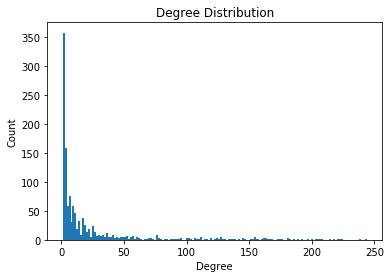

In [14]:
# Histogram of Degree Distribution
degree_sequence=sorted(nx.degree(air_net).values(),reverse=True)
pdf, bins, patch = plt.hist(degree_sequence, bins=len(set(degree_sequence)))   
plt.title("Degree Distribution")
plt.ylabel("Count")
plt.xlabel("Degree")

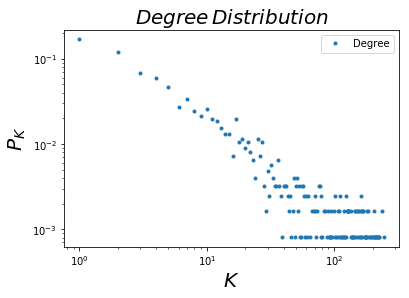

In [15]:
# Plotting the degree distribution in log log plot
def plotDegreeDistribution(G):
    from collections import defaultdict
    import numpy as np
    import matplotlib.pyplot as plt
    %matplotlib inline
    degs = defaultdict(int)
    for i in G.degree().values(): degs[i]+=1
    items = sorted ( degs.items () )
    x, y = np.array(items).T
    y = [float(i) / sum(y) for i in y]
    plt.plot(x, y, '.')
    plt.xscale('log')
    plt.yscale('log')
    plt.legend(['Degree'])
    plt.xlabel('$K$', fontsize = 20)
    plt.ylabel('$P_K$', fontsize = 20)
    plt.title('$Degree\,Distribution$', fontsize = 20)
    plt.show()
    
plotDegreeDistribution(air_net)

# Small World

In [16]:
largest_component=max(nx.connected_component_subgraphs(air_net), key=len)

In [17]:
print("average shortest path length of the airport network: ", nx.average_shortest_path_length(largest_component))
print("average clustering coefficient of the airport network: ",nx.average_clustering(largest_component))

print(nx.info(largest_component))

average shortest path length of the airport network:  3.048301547295375
average clustering coefficient of the airport network:  0.5089151206103169
Name: 
Type: Graph
Number of nodes: 1230
Number of edges: 15163
Average degree:  24.6553


In [18]:
# Creating a random graph with same number of nodes and about same number of edges 

random_graph = nx.erdos_renyi_graph(1230, 0.0199)
print(nx.info(random_graph))

Name: gnp_random_graph(1230,0.0199)
Type: Graph
Number of nodes: 1230
Number of edges: 15266
Average degree:  24.8228


In [19]:
print("average shortest path length of the random network: ",nx.average_shortest_path_length(random_graph))
print("average clustering coefficient of the random network: ",nx.average_clustering(random_graph))

average shortest path length of the random network:  2.573343388437953
average clustering coefficient of the random network:  0.020451125345017224


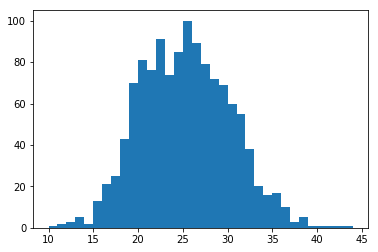

In [20]:
# Histogram of degree distribution of random graph
degree_random = []
for i in range (len(random_graph)):
    degree_random.append(random_graph.degree(i))
#print(degree_random)    
pdf, bins, patch = plt.hist(degree_random, bins=len(set(degree_random)))    

Airport graph has many nodes with smaller degree and few nodes with higher degree which means the network is sparse. The real network is compared with a random graph of same number of nodes and same number of edges. 
The result shows the average path length of real and random graph is almost same whereas the clustering coefficient of the airport network is higher than the random network. This means the airport network shows the small world properties.

# Friendship Paradox

In [21]:
# Function to calculate average degree of neighbors of a node 
def avg_neighbor_drgree(node, graph):
    l = graph.neighbors(node)
    avg_degree = np.mean([graph.degree(n) for n in l])
    return avg_degree

In [22]:
# Calculates the fraction of nodes in a graph that has higher average neighbors degree than its own degree
def fraction_paradox(graph):
    ct = 0
    nodes = graph.nodes()
    for node in nodes:
        degree = graph.degree(node)
        avg_n_degree = avg_neighbor_drgree(node, graph)
        if avg_n_degree > degree:
            ct += 1
    fraction = ct/len(graph)   
    # print("Fraction of nodes in the graph which have a larger average neighbor degree than their own is : ", fraction)
    return fraction

In [23]:
fraction_paradox(largest_component)

0.9146341463414634

91% of nodes in the largest component of the airport network has higher average neighbor degree than its own degree, so friendship paradox exists here predominently in the airport network